# CIA - 1

Name: Purusharth Malik

Registration No.: 2348542

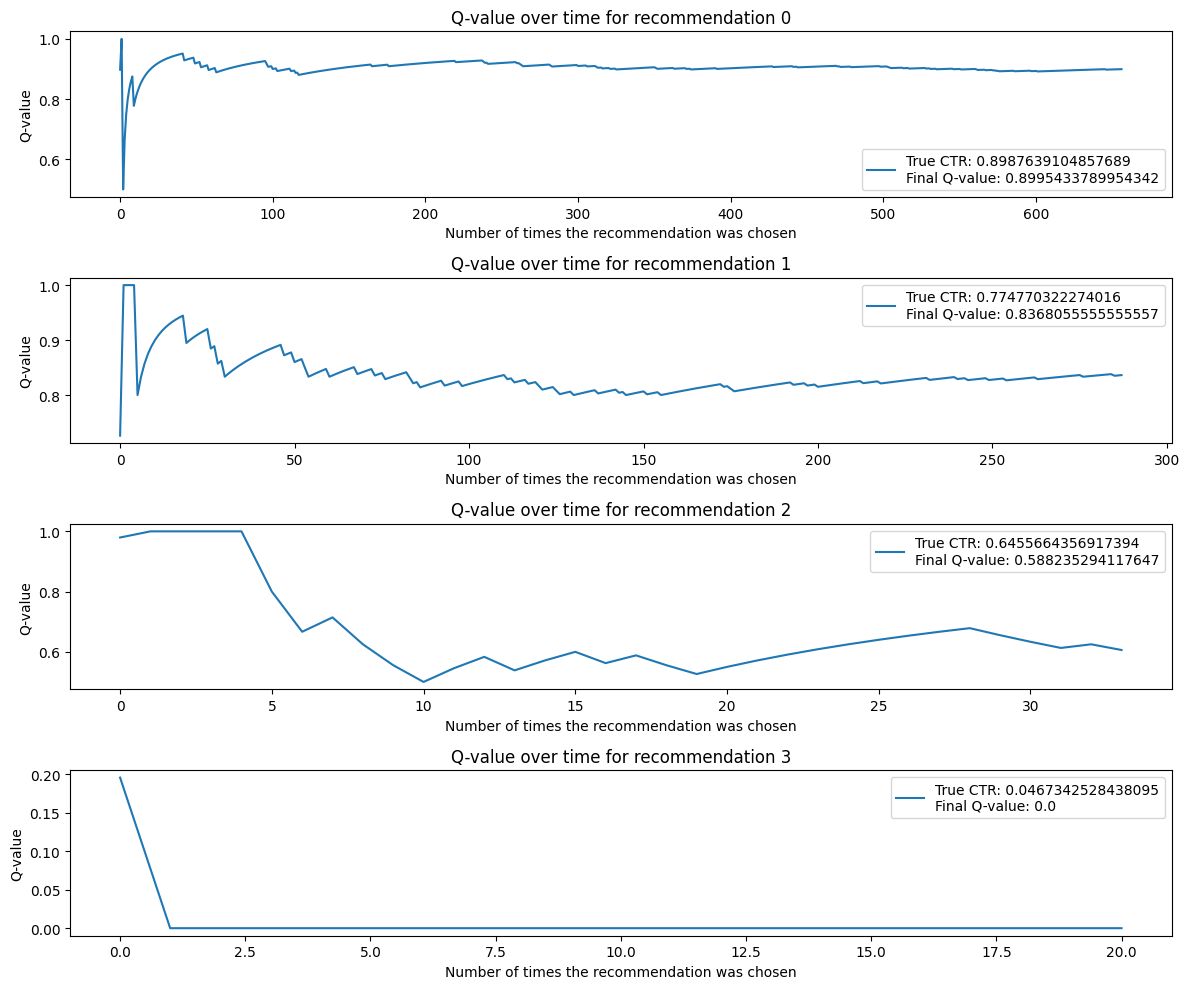

Total Clicks after 1000 recommendations: 852
Recommendation 0:
Chosen: 657 times
True CTR: 0.8987639104857689
Clicks: 0.8995433789954342


Recommendation 1:
Chosen: 288 times
True CTR: 0.774770322274016
Clicks: 0.8368055555555557


Recommendation 2:
Chosen: 34 times
True CTR: 0.6455664356917394
Clicks: 0.588235294117647


Recommendation 3:
Chosen: 21 times
True CTR: 0.0467342528438095
Clicks: 0.0




In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a class for the bandit
class Bandit:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.q_value = np.random.rand(n_arms)
        self.count = np.zeros(n_arms)
        self.values_over_time = {
                                0: [],
                                1: [],
                                2: [],
                                3: []
                            }

    # Function to select an arm using epsilon-greedy
    def selection(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.q_value)
        
    # Updating the Q-value
    def update(self, arm, reward):
        self.count[arm] += 1
        self.values_over_time[arm].append(self.q_value[arm])
        self.q_value[arm] += (reward - self.q_value[arm]) / self.count[arm]

arms = 4
true_ctr = np.random.random(4)
epsilon = 0.1
n = 1000

# Creating an object for the bandit
obj = Bandit(arms, epsilon)
total_clicks = 0

# Deploying the algorithm
for i in range(n):
    # Choosing an arm
    chosen_arm = obj.selection()
    # Reward will be binary in nature
    reward = np.random.binomial(1, true_ctr[chosen_arm])
    # Updating the estimated value
    obj.update(chosen_arm, reward)
    total_clicks += reward

# Plotting the q-values
fig, axs = plt.subplots(4, figsize=(12, 10))
for i in range(arms):
    q = obj.values_over_time[i]
    axs[i].plot(range(len(q)), q,
                label=f"True CTR: {true_ctr[i]}\nFinal Q-value: {obj.q_value[i]}")
    axs[i].set_title(f"Q-value over time for recommendation {i}")
    axs[i].set(xlabel="Number of times the recommendation was chosen",
               ylabel="Q-value")
    axs[i].legend()
    plt.tight_layout()
plt.show()

print(f"Total Clicks after {n} recommendations: {total_clicks}")
for i in range(arms):
    print(f"Recommendation {i}:\nChosen: {int(obj.count[i])} times\nTrue CTR: {true_ctr[i]}\nClicks: {obj.q_value[i]}\n\n")

# End